## Observations and Insights 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files_
mouse_metadata_path = "data_files/Mouse_metadata.csv"
study_results_path = "data_files/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (merge with an inner join on mouse ID)
main_study_df =  pd.merge(mouse_metadata,study_results,on="Gender")

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import gaussian_kde
import scipy.stats as sts
# Study data files_
mouse_metadata_path = "data_files/Mouse_metadata.csv"
study_results_path = "data_files/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset (merge with an inner join on mouse ID)
main_study_df =  pd.merge(mouse_metadata,study_results,on="Mouse ID")
main_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the DataFrame.
mouse_count = main_study_df["Mouse ID"].nunique()
print('Mouse Count = ',mouse_count)

Mouse Count =  249


In [68]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_df = main_study_df[main_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
dups_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [69]:
# Optional: Get all the data for the duplicate mouse ID. 
print('DUPLICATES')
dups_df = dups_df[['Mouse ID','Sex','Age_months','Weight (g)','Timepoint']]
print(dups_df)

DUPLICATES
    Mouse ID     Sex  Age_months  Weight (g)  Timepoint
908     g989  Female          21          26          0
909     g989  Female          21          26          0
910     g989  Female          21          26          5
911     g989  Female          21          26          5
912     g989  Female          21          26         10
913     g989  Female          21          26         10
914     g989  Female          21          26         15
915     g989  Female          21          26         15
916     g989  Female          21          26         20
917     g989  Female          21          26         20


Cleaned DataFrame NO duplicates
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


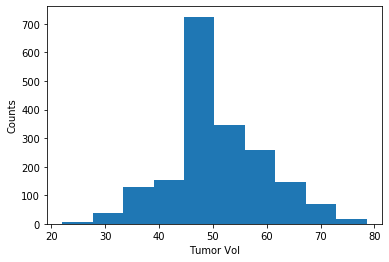

NormaltestResult(statistic=67.56349103102401, pvalue=2.1319368363743865e-15)


In [70]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_dup_df = main_study_df.drop_duplicates(['Mouse ID','Timepoint'],keep= 'last')
cleaned_df = drop_dup_df
print('Cleaned DataFrame NO duplicates')
print(cleaned_df.head())
# Determine tumor volumes are normally distributed
plt.hist(cleaned_df['Tumor Volume (mm3)'])
plt.xlabel('Tumor Vol')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(cleaned_df["Age_months"].sample(100)))


In [71]:
# Checking the number of mice in the clean DataFrame. **Should be same as original count since we only dropped duplicates
new_mouse_count = drop_dup_df["Mouse ID"].nunique()
print('New Mouse Count = ',new_mouse_count)

New Mouse Count =  249


## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
round(cleaned_df.describe(),2)
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1888.00,1888.00,1888.00,1888.00,1888.00
mean,12.79,25.66,19.60,50.45,1.02
std,7.19,3.93,14.08,8.90,1.14
min,1.00,15.00,0.00,22.05,0.00
25%,7.00,25.00,5.00,45.00,0.00
50%,13.00,27.00,20.00,48.95,1.00
75%,20.00,29.00,30.00,56.32,2.00
max,24.00,30.00,45.00,78.57,4.00


## Bar Plots

Text(0, 0.5, 'Count of Mice')

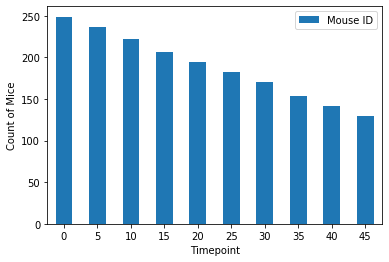

In [189]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_per_treament_df = cleaned_df
counts_df = mice_per_treament_df.groupby('Timepoint').nunique()
mice_df = counts_df
labels= ['0','5','10','15','20','30','35','40','45']
ax = mice_df.plot.bar(y='Mouse ID', rot=0)
plt.ylabel("Count of Mice")


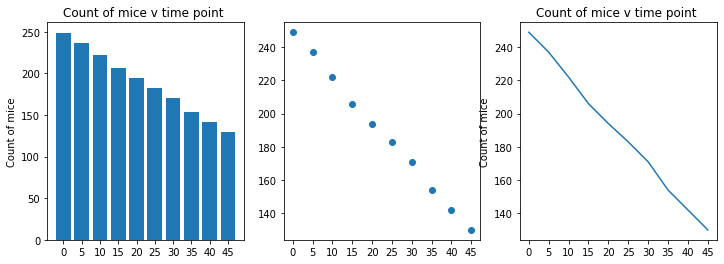

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x000001EF9868D9C8>>

In [219]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.


x_axis = np.arange(len(mice_df))
tick_locations = [value for value in x_axis]
labels= ['0','5','10','15','20','25','30','35','40','45']
values = mice_df["Mouse ID"]
tick_locations = [values+0.4 for value in x_axis]

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(labels, values)
plt.title('Count of mice v time point ')
plt.ylabel('Count of mice')
plt.subplot(132)
plt.scatter(labels, values)
plt.subplot(133)
plt.plot(labels, values)
plt.title('Count of mice v time point ')
plt.ylabel('Count of mice')
plt.show()


mice_df.plot.barh

## Pie Plots

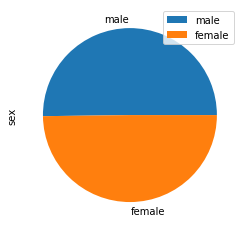

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = drop_dup_df.groupby("Sex")
male = mouse_metadata["Sex"].value_counts()['Male']
female = mouse_metadata["Sex"].value_counts()['Female']
mice=male+female
df= pd.DataFrame({'sex': [male, female]},index=['male', 'female'])
df.plot.pie(y='sex', figsize=(4, 4))
plt.show()

male: 125 Female:  124 Total:  249


([<matplotlib.patches.Wedge at 0x1ef91f72148>,
 [Text(-0.7655308193487089, -0.9241009493704109, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327396, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

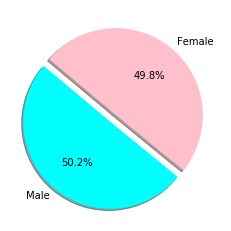

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_df = drop_dup_df.groupby("Sex")
male = mouse_metadata["Sex"].value_counts()['Male']
female = mouse_metadata["Sex"].value_counts()['Female']
mice=male+female
mice_gender_df.head()

print('male:', male, 'Female: ', female, 'Total: ', mice)
#pyplot pie
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male, female]

# The colors of each section of the pie chart
colors = ["cyan", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0,)
           
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)           

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
 
treatment_df = drop_dup_df[drop_dup_df['Timepoint']==45]

treatment_df = treatment_df.sort_values("Drug Regimen")
treatment_df = treatment_df.reset_index(drop=True)

treatment_df = treatment_df.rename({"Drug Regimen": "Treatment","Tumor Volume (mm3)":"Final_vol"}, axis = 'columns')
treatments = treatment_df["Treatment"].unique()

treatment_df
treatment_vol = treatment_df[['Treatment','Final_vol']]

treat_avg = treatment_vol.groupby('Treatment').mean()

treat_avg = treat_avg.sort_values("Final_vol")
print('Top 4 treatments')
print(treat_avg.head(4))

Top 4 treatments
           Final_vol
Treatment           
Ramicane   34.955595
Capomulin  36.236114
Ceftamin   64.132421
Infubinol  65.755562


#Outlier Analysis


In [158]:
#create individual data frames for each treatment(Drug Regimen)
#Ramicane
Ramicane_df = treatment_vol[treatment_vol['Treatment']=='Ramicane']
Ramicane_df = Ramicane_df.reset_index(drop=True)
Ramicane_df = Ramicane_df.rename({"Treatment": "TRamicane","Final_vol":"Ramicane"}, axis = 'columns')
#Capomulin
Capomulin_df = treatment_vol[treatment_vol['Treatment']=='Capomulin']
Capomulin_df = Capomulin_df.reset_index(drop=True)
Capomulin_df = Capomulin_df.rename({"Treatment": "TCopomulin","Final_vol":"Capomulin"}, axis = 'columns')
#Ceftamin
Ceftamin_df = treatment_vol[treatment_vol['Treatment']=='Ceftamin']
Ceftamin_df = Ceftamin_df.reset_index(drop=True)
Ceftamin_df = Ceftamin_df.rename({"Treatment": "TCeftamin","Final_vol":"Ceftamin"}, axis = 'columns')
#infbinol
Infubinol_df = treatment_vol[treatment_vol['Treatment']=='Infubinol']
Infubinol_df = Infubinol_df.reset_index(drop=True)
Infubinol_df = Infubinol_df.rename({"Treatment": "TInfubinol","Final_vol":"Infubinol"}, axis = 'columns')
#Placebo (control group)
Placebo_df = treatment_vol[treatment_vol['Treatment']=='Placebo']
Placebo_df = Placebo_df.reset_index(drop=True)
Placebo_df = Placebo_df.rename({"Treatment": "TPlacebo","Final_vol":"Placebo"}, axis = 'columns')

print(treatment_vol)
a=Ramicane_df.iloc[:,1:].values  
b=Capomulin_df.iloc[:,1:].values 
c=Ceftamin_df.iloc[:,1:].values 
d=Infubinol_df.iloc[:,1:].values

print(Ramicane_df)
print(Capomulin_df)

     Treatment  Final_vol
0    Capomulin  41.581521
1    Capomulin  47.685963
2    Capomulin  41.483008
3    Capomulin  40.728578
4    Capomulin  40.159220
..         ...        ...
125  Zoniferol  62.327966
126  Zoniferol  62.109651
127  Zoniferol  63.488697
128  Zoniferol  60.752704
129  Zoniferol  68.611061

[130 rows x 2 columns]
   TRamicane   Ramicane
0   Ramicane  40.659006
1   Ramicane  38.407618
2   Ramicane  29.128472
3   Ramicane  30.276232
4   Ramicane  30.564625
5   Ramicane  37.311236
6   Ramicane  36.374510
7   Ramicane  33.562402
8   Ramicane  31.560470
9   Ramicane  37.225650
10  Ramicane  31.095335
11  Ramicane  38.810366
12  Ramicane  40.667713
13  Ramicane  33.397653
14  Ramicane  36.134852
15  Ramicane  32.978522
16  Ramicane  30.638696
17  Ramicane  22.050126
18  Ramicane  45.220869
19  Ramicane  43.047543
   TCopomulin  Capomulin
0   Capomulin  41.581521
1   Capomulin  47.685963
2   Capomulin  41.483008
3   Capomulin  40.728578
4   Capomulin  40.159220
5   Capomu

In [171]:
horizontal_stack = pd.concat([Ramicane_df, Capomulin_df,Ceftamin_df,Infubinol_df,Placebo_df], axis=1)

df=horizontal_stack


df=df.drop(df.columns[[0,2,4,6,8]], axis = 1)


Ramicane = df['Ramicane']
Capomulin = df['Capomulin']
Ceftamin = df['Ceftamin']
Infubinol = df['Infubinol']



In [172]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.


q_ram = Ramicane.quantile([.25,.5,.75])
lowerq_ram = q_ram[0.25]
upperq_ram = q_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram
q_cap = Capomulin.quantile([.25,.5,.75])
lowerq_cap = q_cap[0.25]
upperq_cap = q_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap
iqr_ram
iqr_cap

lbcap = lowerq_cap - (1.5*iqr_cap)
ubcap = upperq_cap + (1.5*iqr_cap)
cap_outliers = Capomulin_df.loc[(Capomulin_df['Capomulin'] < lowerq_cap) | (Capomulin_df['Capomulin'] > upperq_cap)]

print(cap_outliers)    

   TCopomulin  Capomulin
0   Capomulin  41.581521
1   Capomulin  47.685963
2   Capomulin  41.483008
3   Capomulin  40.728578
5   Capomulin  40.658124
15  Capomulin  23.343598
16  Capomulin  31.896238
17  Capomulin  28.484033
18  Capomulin  28.430964
20  Capomulin  31.023923


In [95]:
# Here's a function to create density plots for the df of treatment tumor volume
# note this is a free-to-use function not the original code of this student
import os
import numpy as np
from scipy.stats import gaussian_kde
import warnings

try:
    from pandas.plotting._tools import (_subplots, _flatten)
except:
    #TODO this is a quick fix for #38
    from pandas.plotting._matplotlib.tools import (_subplots, _flatten)

from pandas import (DataFrame, Series)
from pandas.core.dtypes.common import is_number
from pandas.core.groupby import DataFrameGroupBy
from matplotlib import pyplot as plt
from warnings import warn

_DEBUG = False

def _x_range(data, extra=0.1):
    """ Compute the x_range, i.e., the values for which the
        density will be computed. It should be slightly larger than
        the max and min so that the plot actually reaches 0, and
        also has a bit of a tail on both sides.
    """
    try:
        sample_range = np.nanmax(data) - np.nanmin(data)
    except ValueError:
        return []
    if sample_range < 1e-6:
        return [np.nanmin(data), np.nanmax(data)]
    return np.linspace(np.nanmin(data) - extra*sample_range,
                       np.nanmax(data) + extra*sample_range, 1000)
def _setup_axis(ax, x_range, col_name=None, grid=False, ylabelsize=None, yrot=None):   # jp axis
    """ Setup the axis for the joyplot:
        - add the y label if required (as an ytick)
        - add y grid if required
        - make the background transparent
        - set the xlim according to the x_range
        - hide the xaxis and the spines
    """
    if col_name is not None:
        ax.set_yticks([0])
        ax.set_yticklabels([col_name], fontsize=ylabelsize, rotation=yrot)
        ax.yaxis.grid(grid)
    else:
        ax.yaxis.set_visible(False)
    ax.patch.set_alpha(0)
    ax.set_xlim(20, 80)                                       #set x range here
    #ax.set_xlim([min(x_range), max(x_range)])
    ax.tick_params(axis='both', which='both', length=0, pad=10)
    ax.xaxis.set_visible(_DEBUG)
    ax.set_frame_on(_DEBUG)

def _is_numeric(x):
    """ Whether the array x is numeric. """
    return all(is_number(i) for i in x)

def _get_alpha(i, n, start=0.4, end=1.0):
    """ Compute alpha value at position i out of n """
    return start + (1 + i)*(end - start)/n

def _remove_na(l):
    """ Remove NA values. Should work for lists, arrays, series. """
    return Series(l).dropna().values

def _moving_average(a, n=3, zero_padded=False):
    """ Moving average of order n.
        If zero padded, returns an array of the same size as
        the input: the values before a[0] are considered to be 0.
        Otherwise, returns an array of length len(a) - n + 1 """
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    if zero_padded:
        return ret / n
    else:
        return ret[n - 1:] / n

def joyplot(data, column=None, by=None, grid=False,
            xlabelsize=None, xrot=None, ylabelsize=None, yrot=None,
            ax=None, figsize=None,
            hist=False, bins=10,
            fade=False, ylim='max',
            fill=True, linecolor=None,                                  #chng 1 to 2
            overlap=1, background=None,
            labels=None, xlabels=True, ylabels=True,
            range_style='all',
            x_range=None,
            title=None,
            colormap=None,
            color=None,
            **kwds):
    """
    Draw joyplot of a DataFrame, or appropriately nested collection,
    using matplotlib and pandas.
    A joyplot is a stack of vertically aligned density plots / histograms.
    By default, if 'data' is a DataFrame,
    this function will plot a density plot for each column.
    This wrapper method tries to convert whatever structure is given
    to a nested collection of lists with additional information
    on labels, and use the private _joyplot function to actually
    draw theh plot.
    Parameters
    ----------
    data : DataFrame, Series or nested collection
    column : string or sequence
        If passed, will be used to limit data to a subset of columns
    by : object, optional
        If passed, used to form separate plot groups
    grid : boolean, default True
        Whether to show axis grid lines
    labels : boolean or list, default True.
        If list, must be the same size of the de
    xlabelsize : int, default None
        If specified changes the x-axis label size
    xrot : float, default None
        rotation of x axis labels
    ylabelsize : int, default None
        If specified changes the y-axis label size
    yrot : float, default None
        rotation of y axis labels
    ax : matplotlib axes object, default None
    figsize : tuple
        The size of the figure to create in inches by default
    hist : boolean, default False
    bins : integer, default 10
        Number of histogram bins to be used
    color : color or colors to be used in the plots. It can be:
        a string or anything interpretable as color by matplotib;
        a list of colors. See docs / examples for more details.
    kwds : other plotting keyword arguments
        To be passed to hist/kde plot function
    """

    if column is not None:
        if not isinstance(column, (list, np.ndarray)):
            column = [column]

    def _grouped_df_to_standard(grouped, column):
        converted = []
        labels = []
        for i, (key, group) in enumerate(grouped):
            if column is not None:
                group = group[column]
            labels.append(key)
            converted.append([_remove_na(group[c]) for c in group.columns if _is_numeric(group[c])])
            if i == 0:
                sublabels = [col for col in group.columns if _is_numeric(group[col])]
        return converted, labels, sublabels

    #################################################################
    # GROUPED
    # - given a grouped DataFrame, a group by key, or a dict of dicts of Series/lists/arrays
    # - select the required columns/Series/lists/arrays
    # - convert to standard format: list of lists of non-null arrays
    #   + extra parameters (labels and sublabels)
    #################################################################
    if isinstance(data, DataFrameGroupBy):
        grouped = data
        converted, _labels, sublabels = _grouped_df_to_standard(grouped, column)
        if labels is None:
            labels = _labels
    elif by is not None and isinstance(data, DataFrame):
        grouped = data.groupby(by)
        if column is None:
            # Remove the groupby key. It's not automatically removed by pandas.
            column = list(data.columns).remove(by)
        converted, _labels, sublabels = _grouped_df_to_standard(grouped, column)
        if labels is None:
            labels = _labels
        # If there is at least an element which is not a list of lists.. go on.
    elif isinstance(data, dict) and all(isinstance(g, dict) for g in data.values()):
        grouped = data
        if labels is None:
            labels = list(grouped.keys())
        converted = []
        for i, (key, group) in enumerate(grouped.items()):
            if column is not None:
                converted.append([_remove_na(g) for k,g in group.items() if _is_numeric(g) and k in column])
                if i == 0:
                    sublabels = [k for k,g in group.items() if _is_numeric(g)]
            else:
                converted.append([_remove_na(g) for k,g in group.items() if _is_numeric(g)])
                if i == 0:
                    sublabels = [k for k,g in group.items() if _is_numeric(g)]
    #################################################################
    # PLAIN:
    # - given a DataFrame or list/dict of Series/lists/arrays
    # - select the required columns/Series/lists/arrays
    # - convert to standard format: list of lists of non-null arrays + extra parameter (labels)
    #################################################################
    elif isinstance(data, DataFrame):
        if column is not None:
            data = data[column]
        converted = [[_remove_na(data[col])] for col in data.columns if _is_numeric(data[col])]
        labels = [col for col in data.columns if _is_numeric(data[col])]
        sublabels = None
    elif isinstance(data, dict):
        if column is not None:
            converted = [[_remove_na(g)] for k,g in data.items() if _is_numeric(g) and k in column]
            labels = [k for k,g in data.items() if _is_numeric(g) and k in column]
        else:
            converted = [[_remove_na(g)] for k,g in data.items() if _is_numeric(g)]
            labels = [k for k,g in data.items() if _is_numeric(g)]
        sublabels = None
    elif isinstance(data, list):
        if column is not None:
            converted = [[_remove_na(g)] for g in data if _is_numeric(g) and i in column]
        else:
            converted = [[_remove_na(g)] for g in data if _is_numeric(g)]
        if labels and len(labels) != len(converted):
            raise ValueError("The number of labels does not match the length of the list.")

        sublabels = None
    else:
        raise TypeError("Unknown type for 'data': {!r}".format(type(data)))

    if ylabels is False:
        labels = None

    if all(len(subg)==0 for g in converted for subg in g):
        raise ValueError("No numeric values found. Joyplot requires at least a numeric column/group.")

    if any(len(subg)==0 for g in converted for subg in g):
        warn("At least a column/group has no numeric values.")


    return _joyplot(converted, labels=labels, sublabels=sublabels,
                    grid=grid,
                    xlabelsize=xlabelsize, xrot=xrot, ylabelsize=ylabelsize, yrot=yrot,
                    ax=ax, figsize=figsize,
                    hist=hist, bins=bins,
                    fade=fade, ylim=ylim,
                    fill=fill, linecolor=linecolor,
                    overlap=overlap, background=background,
                    xlabels=xlabels,
                    range_style=range_style, x_range=x_range,
                    title=title,
                    colormap=colormap,
                    color=color,
                    **kwds)

###########################################

def plot_density(ax, x_range, v, kind="kde", bw_method=None,
                 bins=50,
                 fill=False, linecolor=None, clip_on=True, **kwargs):
    """ Draw a density plot given an axis, an array of values v and an array
        of x positions where to return the estimated density.
    """
    v = _remove_na(v)
    if len(v) == 0 or len(x_range) == 0:
        return

    if kind == "kde":
        try:
            gkde = gaussian_kde(v, bw_method=bw_method)
            y = gkde.evaluate(x_range)
        except ValueError:
            # Handle cases where there is no data in a group.
            y = np.zeros_like(x_range)
        except np.linalg.LinAlgError as e:
            # Handle singular matrix in kde computation.
            distinct_values = np.unique(v)
            if len(distinct_values) == 1:
                # In case of a group with a single value val,
                # that should have infinite density,
                # return a δ(val)
                val = distinct_values[0]
                warnings.warn("The data contains a group with a single distinct value ({}) "
                              "having infinite probability density. "
                              "Consider using a different visualization.".format(val))

                # Find index i of x_range
                # such that x_range[i-1] < val ≤ x_range[i]
                i = np.searchsorted(x_range, val)

                y = np.zeros_like(x_range)
                y[i] = 1
            else:
                raise e

    elif kind == "counts":
        y, bin_edges = np.histogram(v, bins=bins, range=(min(x_range), max(x_range)))
        # np.histogram returns the edges of the bins.
        # We compute here the middle of the bins.
        x_range = _moving_average(bin_edges, 2)
    elif kind == "normalized_counts":
        y, bin_edges = np.histogram(v, bins=bins, density=False,
                                    range=(min(x_range), max(x_range)))
        # np.histogram returns the edges of the bins.
        # We compute here the middle of the bins.
        y = y / len(v)
        x_range = _moving_average(bin_edges, 2)
    elif kind == "values":
        # Warning: to use values and get a meaningful visualization,
        # x_range must also be manually set in the main function.
        y = v
        x_range = list(range(len(y)))
    else:
        raise NotImplementedError

    if fill:
        ax.fill_between(x_range, 0.0, y, clip_on=clip_on, **kwargs)

        # Hack to have a border at the bottom at the fill patch
        # (of the same color of the fill patch)
        # so that the fill reaches the same bottom margin as the edge lines
        # with y value = 0.0
        kw = kwargs
        kw["label"] = None
        ax.plot(x_range, [0.0]*len(x_range), clip_on=clip_on, **kw)

    if linecolor is not None:
        kwargs["color"] = linecolor

    # Remove the legend labels if we are plotting filled curve:
    # we only want one entry per group in the legend (if shown).
    if fill:
        kwargs["label"] = None

    ax.plot(x_range, y, clip_on=clip_on, **kwargs)

###########################################

def _joyplot(data,
             grid=False,
             labels=None, sublabels=None,
             xlabels=True,
             xlabelsize=None, xrot=None,
             ylabelsize=None, yrot=None,
             ax=None, figsize=None,
             hist=False, bins=10,                       #hist = true
             fade=False,
             xlim=None, ylim='max',
             fill=True, linecolor=None,
             overlap=1, background=None,
             range_style='all', x_range=None, tails=0.8,
             title=None,
             legend=False, loc="upper right",
             colormap=None, color=None,
             **kwargs):
    """
    Internal method.
    Draw a joyplot from an appropriately nested collection of lists
    using matplotlib and pandas.
    Parameters
    ----------
    data : DataFrame, Series or nested collection
    grid : boolean, default True
        Whether to show axis grid lines
    labels : boolean or list, default True.
        If list, must be the same size of the de
    xlabelsize : int, default None
        If specified changes the x-axis label size
    xrot : float, default None
        rotation of x axis labels
    ylabelsize : int, default None
        If specified changes the y-axis label size
    yrot : float, default None
        rotation of y axis labels
    ax : matplotlib axes object, default None
    figsize : tuple
        The size of the figure to create in inches by default
    hist : boolean, default False
    bins : integer, default 10
        Number of histogram bins to be used
    kwarg : other plotting keyword arguments
        To be passed to hist/kde plot function
    """

    if fill is True and linecolor is None:
        linecolor = "k"

    if sublabels is None:
        legend = False

    def _get_color(i, num_axes, j, num_subgroups):
        if isinstance(color, list):
            return color[j] if num_subgroups > 1 else color[i]
        elif color is not None:
            return color
        elif isinstance(colormap, list):
            return colormap[j](i/num_axes)
        elif color is None and colormap is None:
            num_cycle_colors = len(plt.rcParams['axes.prop_cycle'].by_key()['color'])
            return plt.rcParams['axes.prop_cycle'].by_key()['color'][j % num_cycle_colors]
        else:
            return colormap(i/num_axes)

    ygrid = (grid is True or grid == 'y' or grid == 'both')
    xgrid = (grid is True or grid == 'x' or grid == 'both')

    num_axes = len(data)

    if x_range is None:
        global_x_range = _x_range([v for g in data for sg in g for v in sg])
    else:
        global_x_range = _x_range(x_range, 0.0)
    global_x_min, global_x_max = min(global_x_range), max(global_x_range)

    # Each plot will have its own axis
    fig, axes = _subplots(naxes=num_axes, ax=ax, squeeze=False,
                          sharex=True, sharey=False, figsize=figsize,
                          layout_type='vertical')
    _axes = _flatten(axes)

    # The legend must be drawn in the last axis if we want it at the bottom.
    if loc in (3, 4, 8) or 'lower' in str(loc):
        legend_axis = num_axis - 1
    else:
        legend_axis = 0

    # A couple of simple checks.
    if labels is not None:
        assert len(labels) == num_axes
    if sublabels is not None:
        assert all(len(g) == len(sublabels) for g in data)
    if isinstance(color, list):
        assert all(len(g) <= len(color) for g in data)
    if isinstance(colormap, list):
        assert all(len(g) == len(colormap) for g in data)

    for i, group in enumerate(data):
        a = _axes[i]
        group_zorder = i
        if fade:
            kwargs['alpha'] = _get_alpha(i, num_axes)

        num_subgroups = len(group)

        if hist:
            # matplotlib hist() already handles multiple subgroups in a histogram
            a.hist(group, label=sublabels, bins=bins, color=color,
                   range=[min(global_x_range), max(global_x_range)],
                   edgecolor=linecolor, zorder=group_zorder, **kwargs)
        else:
            for j, subgroup in enumerate(group):

                # Compute the x_range of the current plot
                if range_style == 'all':
                # All plots have the same range
                    x_range = global_x_range
                elif range_style == 'own':
                # Each plot has its own range
                    x_range = _x_range(subgroup, tails)
                elif range_style == 'group':
                # Each plot has a range that covers the whole group
                    x_range = _x_range(group, tails)
                elif isinstance(range_style, (list, np.ndarray)):
                # All plots have exactly the range passed as argument
                    x_range = _x_range(range_style, 0.0)
                else:
                    raise NotImplementedError("Unrecognized range style.")

                if sublabels is None:
                    sublabel = None
                else:
                    sublabel = sublabels[j]

                element_zorder = group_zorder + j/(num_subgroups+1)
                element_color = _get_color(i, num_axes, j, num_subgroups)

                plot_density(a, x_range, subgroup,
                             fill=fill, linecolor=linecolor, label=sublabel,
                             zorder=element_zorder, color=element_color,
                             bins=bins, **kwargs)


        # Setup the current axis: transparency, labels, spines.
        col_name = None if labels is None else labels[i]
        _setup_axis(a, global_x_range, col_name=col_name, grid=ygrid,
                ylabelsize=ylabelsize, yrot=yrot)

        # When needed, draw the legend
        if legend and i == legend_axis:
            a.legend(loc=loc)
            # Bypass alpha values, in case
            for p in a.get_legend().get_patches():
                p.set_facecolor(p.get_facecolor())
                p.set_alpha(1.0)
            for l in a.get_legend().get_lines():
                l.set_alpha(1.0)


    # Final adjustments

    # Set the y limit for the density plots.
    # Since the y range in the subplots can vary significantly,
    # different options are available.
    if ylim == 'max':
        # Set all yaxis limit to the same value (max range among all)
        max_ylim = max(a.get_ylim()[1] for a in _axes)
        min_ylim = min(a.get_ylim()[0] for a in _axes)
        for a in _axes:
            a.set_ylim([min_ylim - 0.1*(max_ylim-min_ylim), max_ylim])

    elif ylim == 'own':
        # Do nothing, each axis keeps its own ylim
        pass

    else:
        # Set all yaxis lim to the argument value ylim
        try:
            for a in _axes:
                a.set_ylim(ylim)
        except:
            print("Warning: the value of ylim must be either 'max', 'own', or a tuple of length 2. The value you provided has no effect.")

    # Compute a final axis, used to apply global settings
    last_axis = fig.add_subplot(1, 1, 1)

    # Background color
    if background is not None:
        last_axis.patch.set_facecolor(background)

    for side in ['top', 'bottom', 'left', 'right']:
        last_axis.spines[side].set_visible(_DEBUG)

    # This looks hacky, but all the axes share the x-axis,
    # so they have the same lims and ticks
    last_axis.set_xlim(_axes[0].get_xlim())
    if xlabels is True:
        last_axis.set_xticks(np.array(_axes[0].get_xticks()[1:-1]))
        for t in last_axis.get_xticklabels():
            t.set_visible(True)
            t.set_fontsize(xlabelsize)
            t.set_rotation(xrot)

        # If grid is enabled, do not allow xticks (they are ugly)
        if xgrid:
            last_axis.tick_params(axis='both', which='both',length=0)
    else:
        last_axis.xaxis.set_visible(False)

    last_axis.yaxis.set_visible(False)
    last_axis.grid(xgrid)


    # Last axis on the back
    last_axis.zorder = min(a.zorder for a in _axes) - 1
    _axes = list(_axes) + [last_axis]

    if title is not None:
        plt.title(title)


    # The magic overlap happens here.
    h_pad = 10 + (- 6*(1 + overlap))
    fig.tight_layout(h_pad=h_pad)


    return fig, _axes

Text(0.5, 1, 'Final Tumor Volume for Treatments')

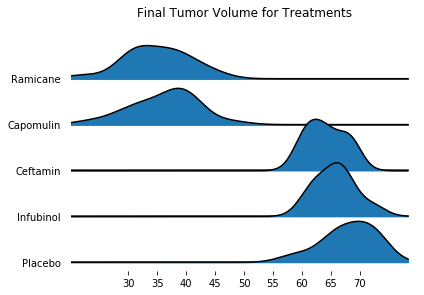

In [89]:
#BONUS - Joyplots (Density plots of Tumor Volumes for the most promising treatments)
# NOTE:  Joyplot function is not the work of this student. It is a free-to-use function.
%matplotlib inline

fig, axes = joyplot(df)

a = axes[-1]
xticks = a.get_xticks()
a.set_xticks(np.arange(xticks.min(), xticks.max()+5, 5))
plt.title("Final Tumor Volume for Treatments")

Text(0, 0.5, 'Tumor Vol mm^3')

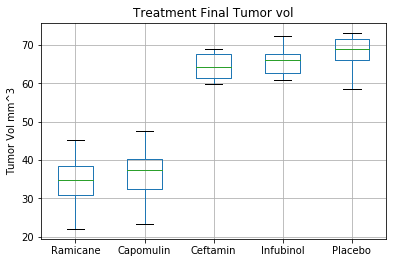

In [184]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#note that 'Placebo' comparison is a must (control). We sort by tumor final volume to obtain the best treatment outcome.
df['Group'] = 'Treatment Final Tumor vol'



df.groupby('Group').boxplot()
plt.ylabel('Tumor Vol mm^3')



     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
1        k403     Ramicane    Male          21          16          5   
2        k403     Ramicane    Male          21          16         10   
3        k403     Ramicane    Male          21          16         15   
4        k403     Ramicane    Male          21          16         20   
...       ...          ...     ...         ...         ...        ...   
1868     z581    Infubinol  Female          24          25         25   
1869     z581    Infubinol  Female          24          25         30   
1870     z581    Infubinol  Female          24          25         35   
1871     z581    Infubinol  Female          24          25         40   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898         

Text(0.5, 1.0, '')

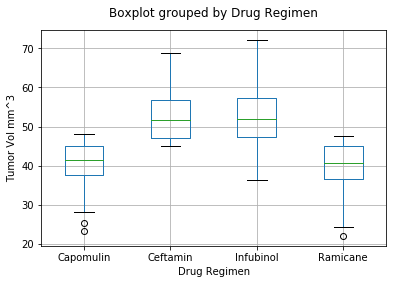

In [190]:

ramicane_filter = cleaned_df[cleaned_df['Drug Regimen'].isin(['Ramicane'])]

filter_df=cleaned_df[cleaned_df['Drug Regimen'].isin(['Ramicane', 'Capomulin','Ceftamin','Infubinol'])]
print(filter_df)
filter_df.boxplot(by='Drug Regimen', 
                       column=['Tumor Volume (mm3)'], 
                       grid=True)
plt.ylabel('Tumor Vol mm^3')
plt.title('')
#cleaned_df.boxplot(by='Drug Regimen')

## Line and Scatter Plots

-0.98


Text(0, 28, 'R-sqr= 0.96')

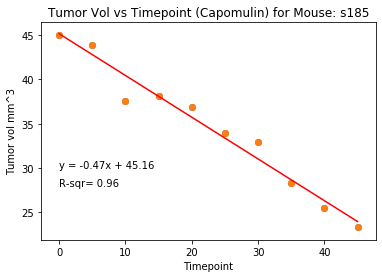

In [163]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# get how many time points are unique
timepts = drop_dup_df["Timepoint"].nunique()
drug_reg_df = drop_dup_df.groupby("Drug Regimen")
#print(drug_reg_df.head())
Capomulin = drop_dup_df[drop_dup_df['Drug Regimen']=='Capomulin']

df_plot_scatter = Capomulin.head(timepts)

mouse = df_plot_scatter.iloc[0, 0]

plt.scatter(df_plot_scatter['Timepoint'], df_plot_scatter['Tumor Volume (mm3)'])
#plt.title('Tumor Vol vs Timepoint for mouse:',mouse)
plt.xlabel("Timepoint")
plt.ylabel("Tumor vol mm^3")
plt.title("Tumor Vol vs Timepoint (Capomulin) for Mouse: "+ mouse)

x = np.array(df_plot_scatter['Timepoint'])
y = np.array(df_plot_scatter['Tumor Volume (mm3)'])
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)
rsqr = round(rvalue**2,2)
rstring = str(rsqr)
rstring = 'R-sqr= '+ rstring
print (rvalue)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="black")
plt.annotate(rstring,(0,28),fontsize=10,color="black")


## Correlation and Regression

Text(20, 28, 'r-sqr =0.28')

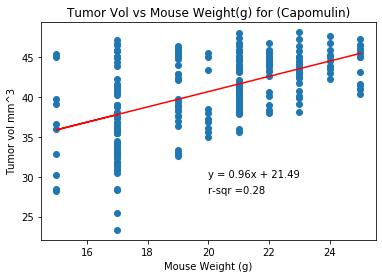

In [164]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Get x and y for plot

x = np.array(Capomulin['Weight (g)'])
y = np.array(Capomulin['Tumor Volume (mm3)'])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor vol mm^3")
plt.title("Tumor Vol vs Mouse Weight(g) for (Capomulin)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
rvalue = round(rvalue,2)

rsqr = round(rvalue**2,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
rstring= 'r-sqr =' + str(rsqr)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=10,color="black")
plt.annotate(rstring,(20,28),fontsize=10,color="black")


## Correlation and Regression

In [216]:
#We know that the Tumor volumes are not normally distributed, but for fun
#let's run a multiple linear regression using OLS method to see if tumor volumes are impacted by other factors
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder

ramificane_filter = ramicane_filter.drop(['Timepoint', 'Metastatic Sites','Mouse ID','Drug Regimen'], axis=1)
df_sex = ramicane_filter.drop(['Weight (g)', 'Age_months','Tumor Volume (mm3)'], axis=1)

lb_make = LabelEncoder()
df_code["sex_code"] = lb_make.fit_transform(ramificane_filter["Sex"])
df_code[["Sex", "sex_code"]].head(11)
ramificane_filter['sex']=df_code["sex_code"]
print(ramificane_filter)
X = ramificane_filter[['sex','Age_months','Weight (g)']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = ramificane_filter['Tumor Volume (mm3)']

regr = linear_model.LinearRegression()
regr.fit(X, Y)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)



        Sex  Age_months  Weight (g)  Tumor Volume (mm3)  sex
0      Male          21          16           45.000000    1
1      Male          21          16           38.825898    1
2      Male          21          16           35.014271    1
3      Male          21          16           34.223992    1
4      Male          21          16           32.997729    1
..      ...         ...         ...                 ...  ...
449  Female           5          24           43.166373    0
450    Male          19          24           45.000000    1
451    Male          19          24           45.877545    1
452    Male          19          24           46.378092    1
453    Male          19          24           44.183451    1

[228 rows x 5 columns]
                                 OLS Regression Results                                
Dep. Variable:     Tumor Volume (mm3)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):